In [1]:
import numpy as np 
import pywt
import matplotlib.pyplot as plt
from scipy.misc import (imshow, imread)

%matplotlib inline

for name in ['Barb', 'Bird', 'Boat', 'Bridge', 'Crosses',\
 'Goldhill','Horiz','Lena','Mandrill','Peppers','Slope',\
 'Squares','Text','Washsat','Zelda']:
  !wget http://www.math.uni.wroc.pl/~mpal/academic/2012/Datasets/{name}.gif

!mkdir data
!mv *.gif data 

In [2]:
lena = imread('dane/Lena.gif')

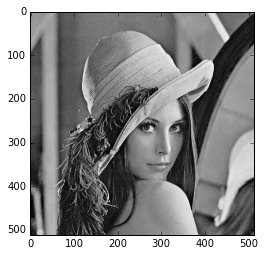

In [3]:
plt.imshow(lena, cmap ='gray')

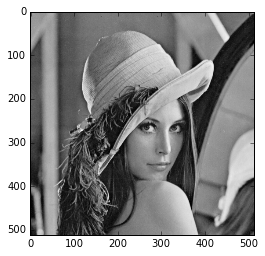

In [4]:
plt.imshow((lena.astype(np.double) / 1.2), cmap='gray')

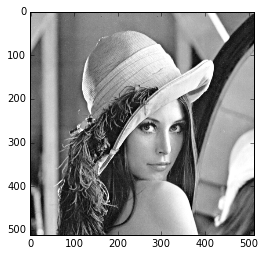

In [5]:
plt.imshow((lena.astype(np.double) * 1.2).clip(0, 255), cmap='gray')

In [24]:
w = pywt.Wavelet('sym3')
(cA, (cH, cV, cD)) = pywt.dwt2(lena, wavelet=w, mode='periodization')

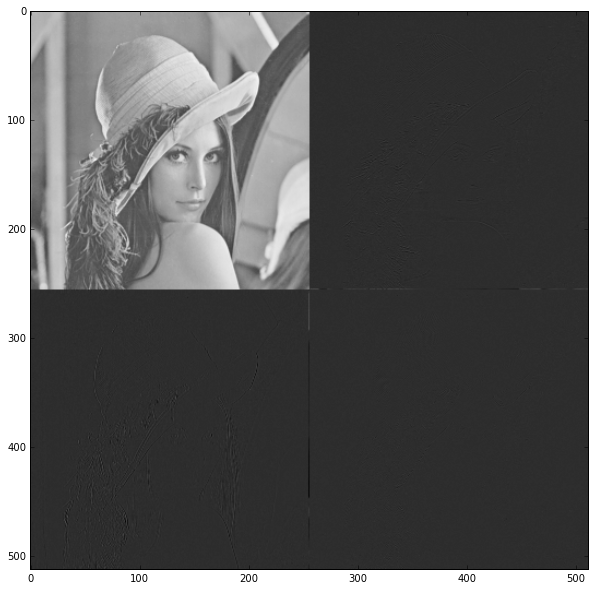

In [36]:
stacked_img = (np.vstack(
    [np.hstack([cA, cH]),
     np.hstack([cV, cD])]))

plt.figure(figsize=(20,10))
plt.imshow(stacked_img, cmap = 'gray')